# Computer - desktop/server
 * AMD Ryzen Threadripper 3970X (32 cores, we will use 8 today)
 * 128GB RAM (it would happily work on 16-32GB)
 * Costs ~5k euro
 
Notebook at https://github.com/vaexio/vaex-talks/tree/master/2020-scipy


In [1]:
import warnings;
warnings.simplefilter('ignore')
import matplotlib
matplotlib.rcParams['figure.dpi'] = 120

# Opening files

In [2]:
import vaex
import numpy as np
vaex.multithreading.thread_count_default = 8

In [3]:
!ls -alh /data/gaia/gaia-dr2-sort-by-source_id.hdf5

-rw-r--r-- 1 maartenbreddels adm 1,2T mei  4 16:21 /data/gaia/gaia-dr2-sort-by-source_id.hdf5


In [6]:
# hdf5 or arrow - memory mapped
df = vaex.open('/data/gaia/gaia-dr2-sort-by-source_id.hdf5')
df

#,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper
0,1635721458409799680,b'Gaia DR2 4295806720',4295806720,833719442,2015.5,44.9961536841596,0.119381727827906,0.005615806210679649,0.12287249077395065,0.07144782399869501,0.16248493485095816,0.43971968,11.733411429340324,0.2431241681877592,-4.7759340851709,0.2389884371856387,0.022670548,0.27376112,-0.061221834,0.09342154,-0.43380169999999996,-0.10258209,-0.23457742,0.2862106,0.24838115,0.30606467,107,0,106,1,1.6358627000000001,125.30832,0.0,0.0,31,False,1.6281219999999998,1.6129292688600716,0.03975095740667449,0.026966427,13,10,0.25016737,0,13,False,103,1635.9507708728468,2.7757613305963007,589.3701,17.65394,10,785.6408778060331,8.304744041442405,94.601456,18.113329,11,1205.3932347369573,12.695619867587247,94.9456,17.059097,1.2170502,0,1.0542316,0.45938873,0.5948429000000001,nan,nan,0,nan,nan,nan,b'NOT_AVAILABLE',176.9510737567222,-48.901521688994805,42.5337243367526,-16.32957311107743,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,1635721458409799680,b'Gaia DR2 34361129088',34361129088,1253687186,2015.5,45.00431616420765,0.13221516031053107,0.021045032689712983,0.15033009946029466,3.48677407917816,0.1943677537725032,17.939056,30.2997273525487,0.2890571540060363,20.102047674607906,0.2904121164006919,0.06490505,0.10328879,-3.8125843e-05,0.010977124,-0.5181503,-0.15682727,-0.25213727,0.25715247,0.36133286,0.21847394,97,0,97,0,3.1044097,139.97816,0.4393295485806768,2.2560181660871423,31,False,1.285051,1.3322381786391089,0.043729691466259976,0.030602371,11,9,0.29393765,0,11,False,96,1712.9128925457007,3.0338739347619077,564.59595,17.604027,11,397.3368347119427,13.369227259151073,29.720254999999998,18.85349,10,2155.4795941459947,8.25350128363993,261.15942,16.428060000000002,1.4903364,0,2.4254303,1.249464,1.1759663,nan,nan,0,nan,nan,nan,b'NOT_AVAILABLE',176.94278716312405,-48.88493841774036,42.54656815575859,-16.317213719979975,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,1635721458409799680,b'Gaia DR2 38655544960',38655544960,1168973894,2015.5,45.004974244984105,0.029723176168001464,0.019877000365797717,0.0398615194906984,3.1212565825574363,0.04667520041451068,66.87184,29.669773387717747,0.07106567711614904,19.225962799772443,0.08279741152631212,0.11690165,0.2090516,-0.14794418,-0.082815714,-0.6151166,-0.4523399,-0.59776425,0.45273238,0.47702566,0.595477,104,0,104,0,-2.2898765,69.61933,0.0,0.0,31,False,

# Expressions / virtual columns

In [7]:
distance = 1/df.parallax
distance

Expression = (1 / parallax)
Length: 1,692,919,135 dtype: float64 (expression)
-------------------------------------------------
         0   13.9962
         1  0.286798
         2  0.320384
         3  0.633376
         4   8.89496
        ...         
1692919130       nan
1692919131   1.02382
1692919132  -5.47233
1692919133  0.837194
1692919134  0.505642

In [8]:
# virtual columns - lazy - no memory usage
df['distance'] = distance

In [9]:
df

#,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,distance
0,1635721458409799680,b'Gaia DR2 4295806720',4295806720,833719442,2015.5,44.9961536841596,0.119381727827906,0.005615806210679649,0.12287249077395065,0.07144782399869501,0.16248493485095816,0.43971968,11.733411429340324,0.2431241681877592,-4.7759340851709,0.2389884371856387,0.022670548,0.27376112,-0.061221834,0.09342154,-0.43380169999999996,-0.10258209,-0.23457742,0.2862106,0.24838115,0.30606467,107,0,106,1,1.6358627000000001,125.30832,0.0,0.0,31,False,1.6281219999999998,1.6129292688600716,0.03975095740667449,0.026966427,13,10,0.25016737,0,13,False,103,1635.9507708728468,2.7757613305963007,589.3701,17.65394,10,785.6408778060331,8.304744041442405,94.601456,18.113329,11,1205.3932347369573,12.695619867587247,94.9456,17.059097,1.2170502,0,1.0542316,0.45938873,0.5948429000000001,nan,nan,0,nan,nan,nan,b'NOT_AVAILABLE',176.9510737567222,-48.901521688994805,42.5337243367526,-16.32957311107743,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,13.996227513076745
1,1635721458409799680,b'Gaia DR2 34361129088',34361129088,1253687186,2015.5,45.00431616420765,0.13221516031053107,0.021045032689712983,0.15033009946029466,3.48677407917816,0.1943677537725032,17.939056,30.2997273525487,0.2890571540060363,20.102047674607906,0.2904121164006919,0.06490505,0.10328879,-3.8125843e-05,0.010977124,-0.5181503,-0.15682727,-0.25213727,0.25715247,0.36133286,0.21847394,97,0,97,0,3.1044097,139.97816,0.4393295485806768,2.2560181660871423,31,False,1.285051,1.3322381786391089,0.043729691466259976,0.030602371,11,9,0.29393765,0,11,False,96,1712.9128925457007,3.0338739347619077,564.59595,17.604027,11,397.3368347119427,13.369227259151073,29.720254999999998,18.85349,10,2155.4795941459947,8.25350128363993,261.15942,16.428060000000002,1.4903364,0,2.4254303,1.249464,1.1759663,nan,nan,0,nan,nan,nan,b'NOT_AVAILABLE',176.94278716312405,-48.88493841774036,42.54656815575859,-16.317213719979975,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.28679804807878523
2,1635721458409799680,b'Gaia DR2 38655544960',38655544960,1168973894,2015.5,45.004974244984105,0.029723176168001464,0.019877000365797717,0.0398615194906984,3.1212565825574363,0.04667520041451068,66.87184,29.669773387717747,0.07106567711614904,19.225962799772443,0.08279741152631212,0.11690165,0.2090516,-0.14794418,-0.082815714,-0.6151166,-0.4523399,-0.59776425,0.45273238,0.47702566,0.595477,1

# Aggregation and filtering

In [10]:
# out of core aggregation - multithreaded - chunks - eager
df.mean(df.distance)

array(-1.36313359)

In [11]:
# filtering - lazy - no copy - data immutable
dff = df[df.parallax_over_error>3]

In [12]:
dff

#,solution_id,designation,source_id,random_index,ref_epoch,ra,ra_error,dec,dec_error,parallax,parallax_error,parallax_over_error,pmra,pmra_error,pmdec,pmdec_error,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,astrometric_n_obs_ac,astrometric_n_good_obs_al,astrometric_n_bad_obs_al,astrometric_gof_al,astrometric_chi2_al,astrometric_excess_noise,astrometric_excess_noise_sig,astrometric_params_solved,astrometric_primary_flag,astrometric_weight_al,astrometric_pseudo_colour,astrometric_pseudo_colour_error,mean_varpi_factor_al,astrometric_matched_observations,visibility_periods_used,astrometric_sigma5d_max,frame_rotator_object_type,matched_observations,duplicated_source,phot_g_n_obs,phot_g_mean_flux,phot_g_mean_flux_error,phot_g_mean_flux_over_error,phot_g_mean_mag,phot_bp_n_obs,phot_bp_mean_flux,phot_bp_mean_flux_error,phot_bp_mean_flux_over_error,phot_bp_mean_mag,phot_rp_n_obs,phot_rp_mean_flux,phot_rp_mean_flux_error,phot_rp_mean_flux_over_error,phot_rp_mean_mag,phot_bp_rp_excess_factor,phot_proc_mode,bp_rp,bp_g,g_rp,radial_velocity,radial_velocity_error,rv_nb_transits,rv_template_teff,rv_template_logg,rv_template_fe_h,phot_variable_flag,l,b,ecl_lon,ecl_lat,priam_flags,teff_val,teff_percentile_lower,teff_percentile_upper,a_g_val,a_g_percentile_lower,a_g_percentile_upper,e_bp_min_rp_val,e_bp_min_rp_percentile_lower,e_bp_min_rp_percentile_upper,flame_flags,radius_val,radius_percentile_lower,radius_percentile_upper,lum_val,lum_percentile_lower,lum_percentile_upper,distance
0,1635721458409799680,b'Gaia DR2 34361129088',34361129088,1253687186,2015.5,45.00431616420765,0.13221516031053107,0.021045032689712983,0.15033009946029466,3.48677407917816,0.1943677537725032,17.939056,30.2997273525487,0.2890571540060363,20.102047674607906,0.2904121164006919,0.06490505,0.10328879,-3.8125843e-05,0.010977124,-0.5181503,-0.15682727,-0.25213727,0.25715247,0.36133286,0.21847394,97,0,97,0,3.1044097,139.97816,0.4393295485806768,2.2560181660871423,31,False,1.285051,1.3322381786391089,0.043729691466259976,0.030602371,11,9,0.29393765,0,11,False,96,1712.9128925457007,3.0338739347619077,564.59595,17.604027,11,397.3368347119427,13.369227259151073,29.720254999999998,18.85349,10,2155.4795941459947,8.25350128363993,261.15942,16.428060000000002,1.4903364,0,2.4254303,1.249464,1.1759663,nan,nan,0,nan,nan,nan,b'NOT_AVAILABLE',176.94278716312405,-48.88493841774036,42.54656815575859,-16.317213719979975,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.28679804807878523
1,1635721458409799680,b'Gaia DR2 38655544960',38655544960,1168973894,2015.5,45.004974244984105,0.029723176168001464,0.019877000365797717,0.0398615194906984,3.1212565825574363,0.04667520041451068,66.87184,29.669773387717747,0.07106567711614904,19.225962799772443,0.08279741152631212,0.11690165,0.2090516,-0.14794418,-0.082815714,-0.6151166,-0.4523399,-0.59776425,0.45273238,0.47702566,0.595477,104,0,104,0,-2.2898765,69.61933,0.0,0.0,31,False,54.20531999999999,1.5148504032402288,0.010003998099121137,0.07058261,12,9,0.10163828,0,12,False,103,41605.42089500058,18.392505474272053,2262.0854,14.140491,11,17692.585419434203,53.957682875030116,327.89743,14.731910000000001,11,34351.87449020634,58.427462958732775,587.94055,13.422044,1.2509058000000002,0,1.309866,0.5914191999999999,0.71844673,nan,nan,0,nan,nan,nan,b'NOT_AVAILABLE',176.94476069003898,-48.88527495232597,42.54686709098933,-16.318523323705843,100001.0,4962.0,4770.505,5050.6665,0.032,0.0149,0.2091,0.016,0.0069,0.0728,200111.0,0.5863995,0.5659911999999999,0.63442224,0.18780576,0.18156888,0.19404264,0.32038378568052195
2,1635721458409799680,b'Gaia DR2 309238066432',309238066432,716364491,2015.5,44.99503703932583,0.3748451704441453,0.03815183599451371,0.354580932399439,1.5788410668677395,0.4509078829430168,3.5014714999999996,0.9185563546406772,0.8071335238976993,-0.4685586426340295,0.7201817396537079,0.042778816

In [13]:
dff.mean(dff.distance)

array(1.64527875)

In [14]:
distances = df.mean(df.distance, binby=[df.phot_g_mean_mag], limits=[5, 20], shape=100)
distances

array([ 2.04322801e-01, -8.67326041e-02,  2.09344123e-01,  2.44889821e-01,
        2.42443737e-01,  2.75645458e-01,  2.60451711e-01,  2.97047988e-01,
        3.06115490e-01,  2.83810258e-01,  3.05959349e-01,  3.15702557e-01,
        8.97328926e-02,  3.54976058e-01,  4.16271032e-01,  3.84148443e-01,
        4.38291999e-01,  3.97344443e-01,  4.33921258e-01,  4.46700775e-01,
        4.90246486e-01,  4.77647391e-01,  4.98258872e-01,  5.11047502e-01,
        5.52889404e-01,  5.08551103e-01,  5.49160814e-01,  6.70030947e-01,
        6.58296181e-01,  7.03629516e-01,  7.05721531e-01,  7.71547349e-01,
        7.73187063e-01,  7.99464608e-01,  8.31550698e-01,  8.41322485e-01,
        9.29607426e-01,  9.78306562e-01,  6.20219588e-01,  1.08335344e+00,
        1.09011173e+00,  1.15537194e+00,  1.29836917e+00,  1.26519645e+00,
        1.36039298e+00,  1.45479664e+00,  1.78772764e+00,  1.98413593e+00,
        1.65851766e+00,  1.79841693e+00,  1.98547508e+00,  1.53609996e+00,
        1.58929022e+00,  

# Visualization

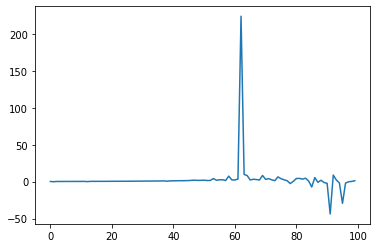

In [15]:
import matplotlib.pylab as plt
plt.plot(distances)

In [16]:
distances = df.mean(df.distance, binby=[df.phot_g_mean_mag], limits=[5, 20], shape=100, array_type='xarray')
distances

<xarray.DataArray (phot_g_mean_mag: 100)>
array([ 2.04322801e-01, -8.67326041e-02,  2.09344123e-01,  2.44889821e-01,
        2.42443737e-01,  2.75645458e-01,  2.60451711e-01,  2.97047988e-01,
        3.06115490e-01,  2.83810258e-01,  3.05959349e-01,  3.15702557e-01,
        8.97328926e-02,  3.54976058e-01,  4.16271032e-01,  3.84148443e-01,
        4.38291999e-01,  3.97344443e-01,  4.33921258e-01,  4.46700775e-01,
        4.90246486e-01,  4.77647391e-01,  4.98258872e-01,  5.11047502e-01,
        5.52889404e-01,  5.08551103e-01,  5.49160814e-01,  6.70030947e-01,
        6.58296181e-01,  7.03629516e-01,  7.05721531e-01,  7.71547349e-01,
        7.73187063e-01,  7.99464608e-01,  8.31550698e-01,  8.41322485e-01,
        9.29607426e-01,  9.78306562e-01,  6.20219588e-01,  1.08335344e+00,
        1.09011173e+00,  1.15537194e+00,  1.29836917e+00,  1.26519645e+00,
        1.36039298e+00,  1.45479664e+00,  1.78772764e+00,  1.98413593e+00,
        1.65851766e+00,  1.79841693e+00,  1.98547508e+00,  1.53609996e+00,
        1.58929022e+00,  4.19080129e+00,  1.91391839e+00,  2.49464845e+00,
        2.55999450e+00,  1.54159419e+00,  7.46048507e+00,  2.38457192e+00,
        2.20757275e+00,  3.57630272e+00,  2.23952525e+02,  9.80693358e+00,
        8.22453811e+00,  2.20952675e+00,  3.28685846e+00,  2.83147301e+00,
        2.27100005e+00,  8.35796874e+00,  3.08808835e+00,  4.05898003e+00,
        2.44126740e+00,  1.31155252e+00,  6.46573718e+00,  4.01637447e+00,
        2.51590762e+00,  1.21889758e+00, -2.58153803e+00,  3.78642888e-01,
        4.24032158e+00,  4.41549267e+00,  3.37524536e+00,  4.63934405e+00,
        7.94796296e-01, -7.24857177e+00,  5.49576748e+00, -8.75295323e-01,
        1.89163821e+00, -1.20448788e+00, -2.24857180e+00, -4.37005864e+01,
        8.91370558e+00,  2.25241257e+00, -1.85734316e+00, -2.93255063e+01,
       -1.85346903e+00, -2.01522744e-01,  3.67815042e-01,  1.19647173e+00])
Coordinates:
  * phot_g_mean_mag  (phot_g_mean_mag) float64 5.075 5.225 5.375 ... 19.78 19.93

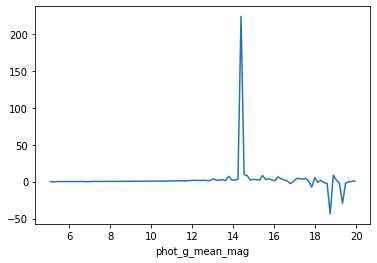

In [17]:
distances.plot()

In [18]:
distances = df.mean(df.distance, binby=[df.phot_g_mean_mag], limits=[5, 20], shape=100, array_type='xarray',
                    selection=[df.parallax_over_error > 1,
                               df.parallax_over_error > 3,
                               df.parallax_over_error > 10])
distances

<xarray.DataArray (selection: 3, phot_g_mean_mag: 100)>
array([[0.2043228 , 0.20855799, 0.20677075, 0.24488982, 0.24480711,
        0.2729951 , 0.26045171, 0.28930038, 0.29342783, 0.31121297,
        0.31719832, 0.33197274, 0.34449391, 0.35517166, 0.3727981 ,
        0.38589477, 0.39479467, 0.40273139, 0.43278005, 0.4484956 ,
        0.45929171, 0.47322512, 0.49783484, 0.51187973, 0.5444121 ,
        0.56947532, 0.5956532 , 0.61417492, 0.64933487, 0.67347525,
        0.70328495, 0.7348454 , 0.76412249, 0.80236634, 0.84359854,
        0.87782799, 0.92307323, 0.96323177, 1.00710126, 1.05030139,
        1.09737218, 1.14228421, 1.19916851, 1.24975812, 1.30544335,
        1.36899753, 1.44196601, 1.51398835, 1.59043667, 1.6620808 ,
        1.72458809, 1.78845168, 1.83549833, 1.9126428 , 2.02278924,
        2.11322311, 2.19297005, 2.26191282, 2.34090514, 2.41349141,
        2.48684726, 2.55751382, 2.6242175 , 2.69383941, 2.76008797,
        2.82467321, 2.88887257, 2.95229716, 3.00163631, 3.04326868,
        3.07056863, 3.07824724, 3.07792587, 3.07142801, 3.05952699,
        3.04758958, 3.04192399, 3.04092867, 3.0408575 , 3.03897116,
        3.03015433, 3.01027987, 2.97427395, 2.9207819 , 2.84915261,
        2.7607328 , 2.65624569, 2.53362529, 2.40034848, 2.26176274,
        2.1182679 , 1.97502416, 1.83393925, 1.68863684, 1.54530653,
        1.41933021, 1.30089646, 1.18968361, 1.08599011, 0.9890113 ],
       [0.18881875, 0.1899532 , 0.20182169, 0.23493068, 0.23101733,
        0.25456112, 0.25998607, 0.28930038, 0.29247351, 0.3100474 ,
        0.31385288, 0.33049923, 0.33975483, 0.3496181 , 0.36933651,
        0.3767583 , 0.39138634, 0.40030779, 0.42718643, 0.44305926,
        0.45499682, 0.46952338, 0.49285786, 0.5074732 , 0.54078186,
        0.5624218 , 0.58825145, 0.60847241, 0.63937375, 0.66523471,
        0.69388963, 0.72491559, 0.74978145, 0.78765403, 0.82578055,
        0.85893131, 0.90116939, 0.93886869, 0.97432769, 1.00955429,
        1.0482872 , 1.07954321, 1.12405718, 1.17258797, 1.21975149,
        1.27027638, 1.32003309, 1.36578154, 1.41653116, 1.46081632,
        1.50273244, 1.54684327, 1.57631459, 1.65152331, 1.76443286,
        1.83742562, 1.89382534, 1.94254235, 1.99600411, 2.04497011,
        2.08919418, 2.13215448, 2.16895285, 2.2017879 , 2.22848173,
        2.24349842, 2.25085847, 2.25260318, 2.24072397, 2.22770487,
        2.21420495, 2.20215865, 2.19623017, 2.19874936, 2.19900425,
        2.19473142, 2.18687613, 2.16741604, 2.13294381, 2.08140156,
        2.01540541, 1.93465867, 1.84174844, 1.74129669, 1.63407042,
        1.52507421, 1.41434637, 1.30182484, 1.19276753, 1.08993411,
        0.99444028, 0.90525786, 0.82501535, 0.75088963, 0.68297958,
        0.6253291 , 0.5718129 , 0.52210623, 0.47576918, 0.43328098],
       [0.16125622, 0.16885421, 0.18000033, 0.189631  , 0.20280343,
        0.22357469, 0.2363877 , 0.24604877, 0.26883299, 0.27342613,
        0.28949532, 0.31043844, 0.31382214, 0.32087648, 0.33852722,
        0.35380046, 0.36291852, 0.37019487, 0.39766475, 0.40851466,
        0.42115013, 0.4334227 , 0.45066317, 0.46778922, 0.49708652,
        0.5172451 , 0.54232829, 0.55753665, 0.58298091, 0.60166313,
        0.62031889, 0.64133409, 0.65780709, 0.67800567, 0.6988451 ,
        0.72240521, 0.7460391 , 0.77273106, 0.78729093, 0.79986971,
        0.81479599, 0.83493819, 0.86481854, 0.90330032, 0.93200726,
        0.96140572, 0.9836186 , 1.00288125, 1.02006884, 1.03678315,
        1.04787152, 1.06623271, 1.1113845 , 1.25939514, 1.35748672,
        1.38897377, 1.40557311, 1.41314962, 1.41502151, 1.41040599,
        1.40249477, 1.38979464, 1.38134639, 1.37675272, 1.37730283,
        1.38272734, 1.39075994, 1.39877797, 1.40167365, 1.3973785 ,
        1.38159015, 1.35309014, 1.31147504, 1.25754545, 1.19318427,
        1.12121423, 1.04948428, 0.97672617, 0.90294928, 0.83101895,
        0.76195821, 0.69463428, 0.6355145 , 0.58249055, 0.53644058,
        0.49640404, 0.46131434, 0.42889773, 0.39972126, 0.37323561

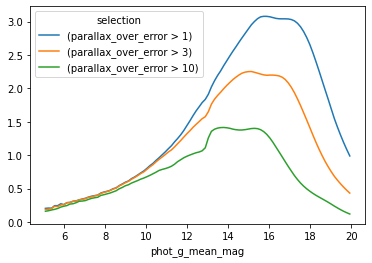

In [19]:
distances.plot(hue='selection')

# Visualization in 2d

In [20]:
sky_counts = df.count(binby=[df.l, df.b], limits=[[0, 360], [-90, 90]], array_type='xarray')
sky_counts

<xarray.DataArray (l: 128, b: 128)>
array([[133, 415, 633, ..., 625, 386, 142],
       [138, 380, 612, ..., 702, 370, 125],
       [133, 360, 644, ..., 617, 399, 116],
       ...,
       [107, 404, 653, ..., 652, 425, 124],
       [142, 439, 703, ..., 662, 405, 107],
       [149, 403, 686, ..., 691, 383, 128]])
Coordinates:
  * l        (l) float64 1.406 4.219 7.031 9.844 ... 350.2 353.0 355.8 358.6
  * b        (b) float64 -89.3 -87.89 -86.48 -85.08 ... 85.08 86.48 87.89 89.3

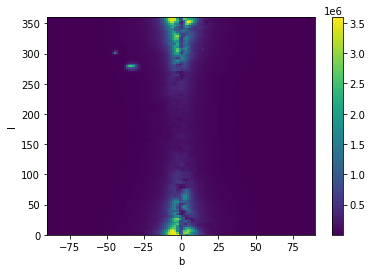

In [21]:
sky_counts.plot()

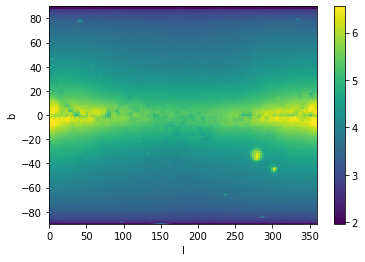

In [22]:
np.log10(sky_counts).T.plot()

# Vaex-jupyter
 * Redraw/re-execute code when a selection changes
 * Connect to ipywidgets (and ipyvuetify, bqplot, plotly)
 * Base widgets for Voila (dashboarding)
 * Deal with async updating, cancelling, scheduling, debouncing (details you do not want to care about)

In [ ]:
# import vaex
# import numpy as np
# import matplotlib
# matplotlib.rcParams['figure.dpi'] = 100
# np.seterr(all='ignore')
# import warnings; warnings.simplefilter('ignore')
# df = vaex.open('/data/gaia/gaia-dr2-sort-by-source_id.hdf5')
# df['distance'] = 1/df.parallax
# df

In [23]:
distance_axis = df.widget.axis_model(df.distance, limits=[0, 30])
distance_axis

Axis(bin_centers=[ 0.234375  0.703125  1.171875  1.640625  2.109375  2.578125  3.046875
  3.515625  3.984375  4.453125  4.921875  5.390625  5.859375  6.328125
  6.796875  7.265625  7.734375  8.203125  8.671875  9.140625  9.609375
 10.078125 10.546875 11.015625 11.484375 11.953125 12.421875 12.890625
 13.359375 13.828125 14.296875 14.765625 15.234375 15.703125 16.171875
 16.640625 17.109375 17.578125 18.046875 18.515625 18.984375 19.453125
 19.921875 20.390625 20.859375 21.328125 21.796875 22.265625 22.734375
 23.203125 23.671875 24.140625 24.609375 25.078125 25.546875 26.015625
 26.484375 26.953125 27.421875 27.890625 28.359375 28.828125 29.296875
 29.765625], exception=None, expression=distance, max=30.0, min=0.0, shape=None, shape_default=64, slice=None, status=Status.READY)

In [24]:
data_array_widget = df.widget.data_array([distance_axis])
data_array_widget

DataArray(children=[Container(children=[ProgressCircularNoAnimation(color='#9ECBF5', size=30, text='', value=1…

In [25]:
distance_axis.max = 21

In [26]:
def my_custom_display(data_array):
    data_array.plot()
data_array_widget = df.widget.data_array([distance_axis], display_function=my_custom_display)
data_array_widget

DataArray(children=[Container(children=[ProgressCircularNoAnimation(color='#9ECBF5', size=30, text='', value=1…

In [27]:
distance_axis.max = 10

In [28]:
logdistance_axis = df.widget.axis_model(np.log(df.distance), limits=[-3, 3])
df.select(df.parallax_over_error > 3)

In [29]:
def my_custom_display_with_selection(data_array):
    data_array.plot(hue='selection')
data_array_widget = df.widget.data_array([logdistance_axis],
                                         display_function=my_custom_display_with_selection,
                                         selection=[None, 'default'])
data_array_widget

DataArray(children=[Container(children=[ProgressCircularNoAnimation(color='#9ECBF5', size=30, text='', value=1…

In [30]:
logdistance_axis.expression = np.log10(df.distance)

In [31]:
logdistance_axis.min = -2
logdistance_axis.max = 2

In [32]:
df.select(df.parallax_over_error > 1)

In [33]:
df.widget.selection_expression()

ExpressionSelectionTextArea(label='Filter by custom expression', placeholder='Enter a custom (boolean) express…

In [34]:
distance_histogram_widget = df.widget.histogram(np.log10(df.distance), limits=[-2, 2], selection=[None, 'default'])
distance_histogram_widget

Histogram(children=[ToolsToolbar(interact_items=[{'value': 'pan-zoom', 'icon': 'pan_tool', 'tooltip': 'Pan & z…

In [35]:
parallax_over_error_histogram_widget = df.widget.histogram(df.parallax_over_error, limits=[0, 30], selection=[None, 'default'])
parallax_over_error_histogram_widget

Histogram(children=[ToolsToolbar(interact_items=[{'value': 'pan-zoom', 'icon': 'pan_tool', 'tooltip': 'Pan & z…

In [36]:
df.widget.heatmap(df.l, df.b, selection=['default'])

Heatmap(children=[ToolsToolbar(interact_value=None, supports_normalize=False, template='<template>\n  <v-toolb…